In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import  drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [3]:
data_folder = '/content/mnt/MyDrive/result/CoffeeIndex/'

In [4]:
starbucks = pd.read_csv(f'{data_folder}/스타벅스.csv')
coffeebean = pd.read_csv(f'{data_folder}/커피빈.csv')
ediya = pd.read_csv(f'{data_folder}/이디야.csv')
paik = pd.read_csv(f'{data_folder}/빽다방.csv')

In [5]:
tmp_gu_dict = {
    '수원':['장안구', '권선구', '팔달구', '영통구'], 
    '성남':['수정구', '중원구', '분당구'], 
    '안양':['만안구', '동안구'], 
    '안산':['상록구', '단원구'], 
    '고양':['덕양구', '일산동구', '일산서구'], 
    '용인':['처인구', '기흥구', '수지구'], 
    '청주':['상당구', '서원구', '흥덕구', '청원구'], 
    '천안':['동남구', '서북구'], 
    '전주':['완산구', '덕진구'], 
    '포항':['남구', '북구'], 
    '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구']
}

In [10]:
metro_list = ['서울특별시','부산광역시','대구광역시','인천광역시','대전광역시','광주광역시','울산광역시']

def get_ID(df):
  si_name = [None]*len(df)
  for i in df.index:
      if df.시도명[i] in metro_list:
          if len(df.시군구명[i]) == 2:
              si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i]
          else:
              si_name[i] = df.시도명[i][:2] + ' ' + df.시군구명[i][:-1]     
      else:
        if len(df.시군구명[i].split()) ==1:
          if df.시군구명[i][:-1] == '고성':
                if df.시도명[i] == '강원도':
                    si_name[i] = '고성(강원)'
                else:
                    si_name[i] = '고성(경남)'
          elif df.시군구명[i][:2] == '세종':
                si_name[i] = '세종'
          else:
                si_name[i] = df.시군구명[i][:-1]
        else:
            sigungu, admingu = df.시군구명[i].split()
            for key, values in tmp_gu_dict.items():
              if df.시군구명[i] in values:
                  if len(df.시군구명[i]) == 2:
                      si_name[i] = key + ' ' + df.시군구명[i]
                  elif df.시군구명[i] in ['마산합포구', '마산회원구']:
                      si_name[i] = key + ' ' + df.시군구명[i][2:-1]
                  else:
                      si_name[i] = key + ' ' + df.시군구명[i][:-1]
  return si_name

In [11]:
starbucks['ID'] = get_ID(starbucks)
sb_set = set(starbucks.ID.unique())

In [12]:
ediya['ID'] = get_ID(ediya)
ed_set = set(ediya.ID.unique())

In [13]:
coffeebean['ID'] = get_ID(coffeebean)
cb_set = set(coffeebean.ID.unique())

In [14]:
paik['ID'] = get_ID(paik)
pk_set = set(paik.ID.unique())

In [16]:
city_set =sb_set|ed_set|cb_set|pk_set
len(city_set)

214

In [17]:
sb_set - ed_set

{'고성(강원)', '영양', '하동'}

In [18]:
starbucks[starbucks.ID.isin({'계룡','고성(강원)','영양','청양','하동'})]

,상호명,지점명,시도명,시군구명,도로명주소,ID
1,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원)
38,스타벅스,NaN,강원도,고성군,강원도 고성군 간성읍 간성로 36,고성(강원)
41,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원)
78,스타벅스,NaN,강원도,고성군,강원도 고성군 간성읍 간성로 36,고성(강원)
81,스타벅스,대명델피노리조트점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,고성(강원)
118,스타벅스,NaN,강원도,고성군,강원도 고성군 간성읍 간성로 36,고성(강원)
514,스타벅스,NaN,경상남도,하동군,경상남도 하동군 하동읍 중앙로 12,하동
550,스타벅스,NaN,경상북도,영양군,경상북도 영양군 석보면 원리길 11-3,영양
1609,스타벅스,NaN,충청남도,청양군,충청남도 청양군 청양읍 중앙로 116-1,청양
1610,스타벅스계룡대로DT점,계룡대로DT점,충청남도,계룡시,충청남도 계룡시 엄사면 번영로 6,계룡


In [19]:
pt_sb = starbucks.pivot_table('상호명', index='ID', aggfunc='count')
pt_sb.head()

,상호명
ID,
가평,2
강릉,15
거제,6
경산,8
경주,8


In [20]:
pt_sb.columns = ['스타벅스']
pt_sb.reset_index(inplace=True)

In [21]:
pt_sb.head()

,ID,스타벅스
0,가평,2
1,강릉,15
2,거제,6
3,경산,8
4,경주,8


In [22]:
pt_cb = coffeebean.pivot_table('상호명', index='ID', aggfunc='count')
pt_cb.columns = ['커피빈']
pt_cb.reset_index(inplace=True)
pt_cb.head()

,ID,커피빈
0,경주,2
1,광명,1
2,광주 남구,2
3,광주 동구,1
4,광주 서구,2


In [23]:
pt_ed = ediya.pivot_table('상호명', index='ID', aggfunc='count')
pt_ed.columns = ['이디야']
pt_ed.reset_index(inplace=True)
pt_ed.head()

,ID,이디야
0,가평,9
1,강릉,48
2,강진,1
3,거제,9
4,거창,1


In [24]:
pt_bd = paik.pivot_table('상호명', index='ID', aggfunc='count')
pt_bd.columns = ['빽다방']
pt_bd.reset_index(inplace=True)
pt_bd.head()

,ID,빽다방
0,강릉,6
1,거창,1
2,경산,4
3,경주,1
4,고성(경남),2


In [25]:
cf = pd.merge(pt_ed, pt_sb, how='left')
cf = pd.merge(cf, pt_cb, how='left')
cf = pd.merge(cf, pt_bd, how='left')
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방
0,가평,9,2.0,NaN,NaN
1,강릉,48,15.0,NaN,6.0
2,강진,1,NaN,NaN,NaN
3,거제,9,6.0,NaN,NaN
4,거창,1,NaN,NaN,1.0


In [26]:
cf.fillna(0,inplace=True)
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방
0,가평,9,2.0,0.0,0.0
1,강릉,48,15.0,0.0,6.0
2,강진,1,0.0,0.0,0.0
3,거제,9,6.0,0.0,0.0
4,거창,1,0.0,0.0,1.0


In [27]:
cf['스타벅스'] = cf.스타벅스.astype(int)
cf['커피빈'] = cf.커피빈.astype(int)
cf['빽다방'] = cf.빽다방.astype(int)

In [28]:
cf['커피지수'] = (cf.스타벅스 + cf.커피빈) / (cf.이디야 + cf.빽다방)

In [30]:
cf.to_csv(f'/content/mnt/MyDrive/result/CoffeeIndex//커피지수.csv', index=False)

In [31]:
import warnings

In [32]:
warnings.filterwarnings('ignore')

In [33]:
import matplotlib.pyplot as plt

In [34]:
data_folder2 = '/content/mnt/MyDrive/데이터/인구소멸위기지역'

In [35]:
!cp $data_folder2/draw_map.py .

In [36]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

In [37]:
map_raw = pd.read_excel(f'/content/mnt/MyDrive/데이터/인구소멸위기지역/draw_korea_raw(2021).xlsx')
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.columns = ['y','x','ID']

(250, 3)


In [38]:
df = pd.merge(map, cf, how='left')
print(df.shape)

(250, 8)


In [39]:
df.fillna(0, inplace=True)
df['이디야'] = df.이디야.astype(int)
df['스타벅스'] = df.스타벅스.astype(int)
df['커피빈'] = df.커피빈.astype(int)
df['빽다방'] = df.빽다방.astype(int)
df.head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,6,0,0,0,0.000000
1,0,8,화천,3,0,0,3,0.000000
2,0,9,양구,3,0,0,0,0.000000
3,0,10,고성(강원),0,0,0,0,0.000000
4,1,3,양주,18,7,0,1,0.368421


In [40]:
df.sort_values(by='커피지수', ascending=False).head(10)

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
66,7,7,서울 강남,32,80,68,9,3.609756
186,17,12,부산 해운대,11,33,4,2,2.846154
65,7,6,서울 서초,20,42,29,6,2.730769
33,4,6,서울 종로,16,31,18,3,2.578947
44,5,6,서울 중구,19,43,11,5,2.250000
6,1,5,연천,1,0,2,0,2.000000
196,18,10,부산 동구,3,5,1,0,2.000000
203,19,6,함안,1,0,2,0,2.000000
151,14,10,대구 수성,10,21,2,3,1.769231
55,6,6,서울 용산,12,22,6,4,1.750000


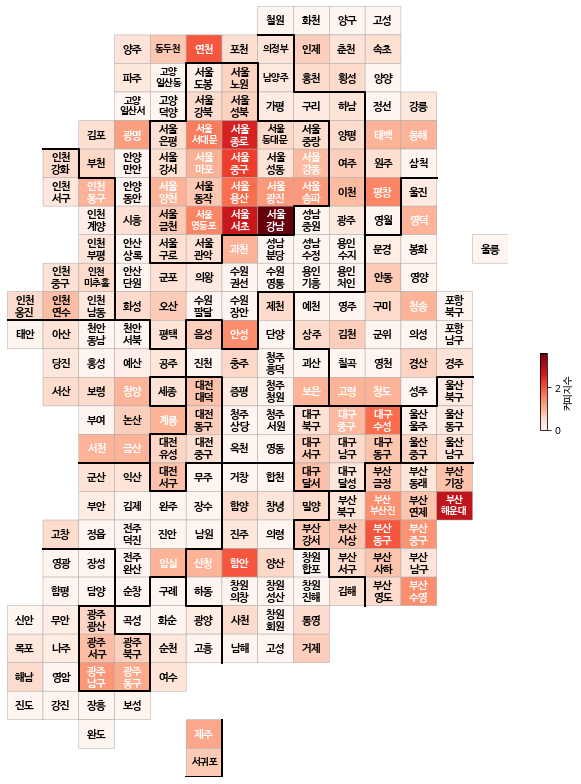

In [41]:
drawKorea('커피지수', df, 'Reds')

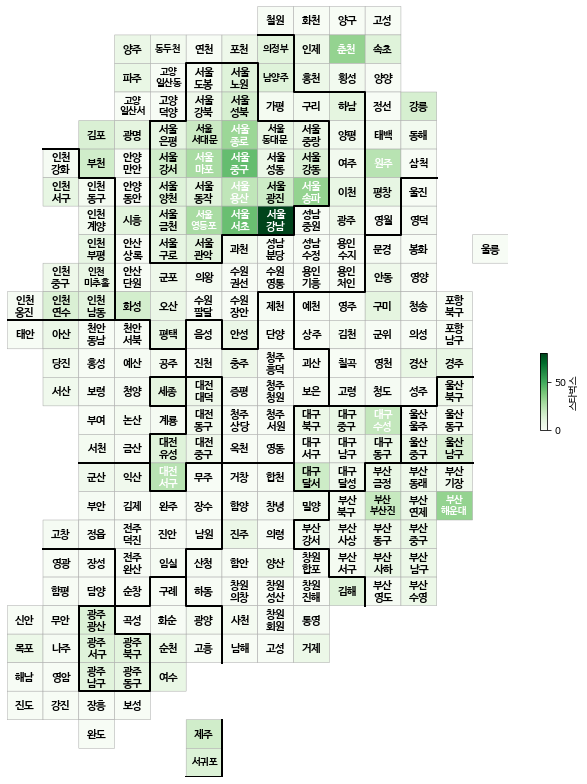

In [42]:
drawKorea('스타벅스', df, 'Greens')

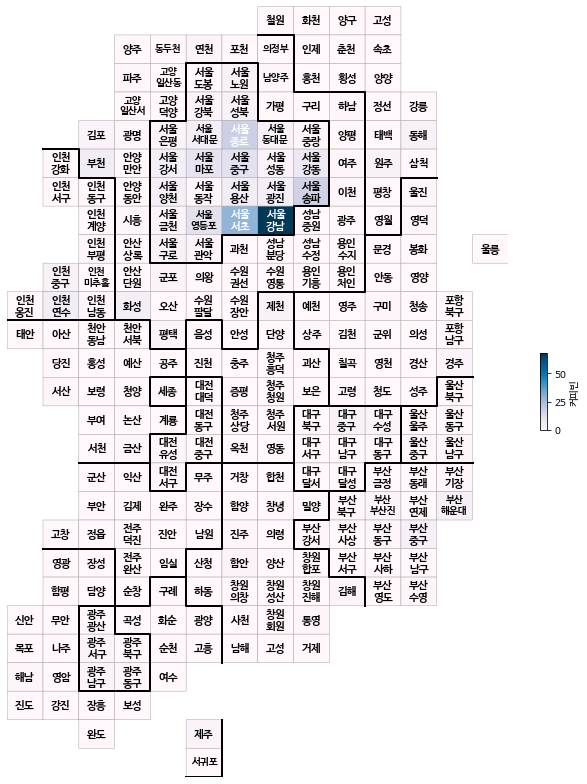

In [43]:
drawKorea('커피빈', df, 'PuBu')

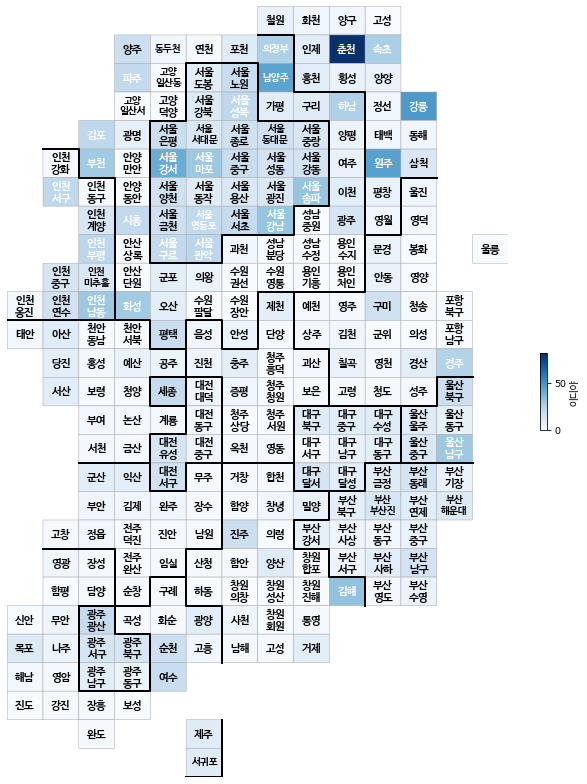

In [44]:
drawKorea('이디야', df, 'Blues')